In [19]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt


In [20]:
# Load TFADJUSTED non-suspicion dataset
df = pd.read_csv('tfadjusted_non_suspicion_results.csv')
print(df.columns)
df.head(100)

Index(['Input.text', 'Answer.sentiment.label', 'Input.label', 'Title',
       'Description'],
      dtype='object')


,Input.text,Answer.sentiment.label,Input.label,Title,Description
0,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
1,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
2,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
3,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
4,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
...,...,...,...,...,...
95,what's surprising about this traditional thril...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
96,what's surprising about this traditional thril...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
97,what's surprising about this traditional thril...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
98,what's surprising about this traditional thril...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...


In [21]:

# Initialize Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight and fast model for semantic similarity


In [22]:
# Filter for real and computer-altered data
real_data = df[df['Answer.sentiment.label'] == 'Real']
# Filter for perturbed sentences (Computer-altered)
perturbed_df = df[df['Answer.sentiment.label'] == 'Computer-altered']

# Ensure the real and altered data are matched correctly
# Assuming they are aligned in the dataset
semantic_similarity_scores = []
for real_row, altered_row in zip(real_data.iterrows(), perturbed_df.iterrows()):
    real_text = real_row[1]['Input.text']  # Real text
    altered_text = altered_row[1]['Input.text']  # Altered text
    
    # Compute embeddings
    real_embedding = model.encode(real_text, convert_to_tensor=True)
    altered_embedding = model.encode(altered_text, convert_to_tensor=True)
    
    # Compute cosine similarity
    similarity = util.pytorch_cos_sim(real_embedding, altered_embedding).item()
    semantic_similarity_scores.append(similarity)


In [23]:
# Add the semantic similarity scores to the DataFrame
perturbed_df['SemanticSimilarityScore'] = semantic_similarity_scores

/var/folders/02/nl6dyky947d7rxn23s6kktc40000gn/T/ipykernel_71027/296815657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perturbed_df['SemanticSimilarityScore'] = semantic_similarity_scores


In [24]:
# Save the updated DataFrame to a new CSV
perturbed_df.to_csv('tfadjusted_semantic_results.csv', index=False)

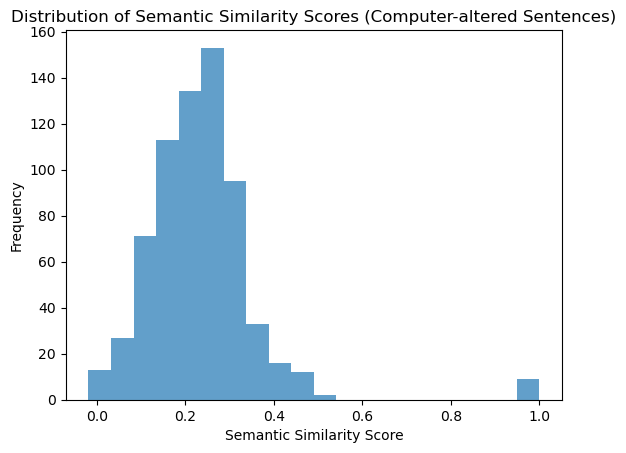

In [25]:
# Verification: Plot a histogram of semantic similarity scores
plt.hist(perturbed_df['SemanticSimilarityScore'], bins=20, alpha=0.7)
plt.xlabel('Semantic Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Semantic Similarity Scores (Computer-altered Sentences)')
plt.show()

In [26]:
if 'non_suspicion_column' in perturbed_df.columns:  
    correlation = perturbed_df['SemanticSimilarityScore'].corr(perturbed_df['non_suspicion_column'])
    print("Correlation between semantic similarity and non-suspicion scores:", correlation)


In [27]:
# Verification: Preview the first few rows
print(perturbed_df.head())

                                          Input.text Answer.sentiment.label  \
0  the sinister inspiration that fuelled devito's...       Computer-altered   
3  the sinister inspiration that fuelled devito's...       Computer-altered   
5  the sinister inspiration that fuelled devito's...       Computer-altered   
7  the sinister inspiration that fuelled devito's...       Computer-altered   
9  the sinister inspiration that fuelled devito's...       Computer-altered   

  Input.label                           Title  \
0        real  Guess reviews are real or fake   
3        real  Guess reviews are real or fake   
5        real  Guess reviews are real or fake   
7        real  Guess reviews are real or fake   
9        real  Guess reviews are real or fake   

                                         Description  SemanticSimilarityScore  
0  You will be randomly shown an online movie rev...                      1.0  
3  You will be randomly shown an online movie rev...                  